# Chapter 2: Toolbox for Data Scientists

__Pandas, Numpy, & Matplotlib.__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

__Creating a Pandas DataFrame__

In [2]:
data = {'year': [2010, 2011, 2012, 2010, 2011, 2012, 2010, 2011, 2012],
        'team': ['FCBarcelona', 'FCBarcelona', 'FCBarcelona', 'RMadrid', 'RMadrid', 'RMadrid', 'ValenciaCF', 'ValenciaCF', 'ValenciaCF'],
        'wins': [30, 28, 32, 29, 32, 26, 21, 17, 19],
        'draws': [6, 7, 4, 5, 4, 7, 8, 10, 8],
        'losses': [2, 3, 2, 4, 2, 5, 9, 11, 11]
        }
football = pd.DataFrame(data, columns=['year','team','wins','draws','losses'])
football

,year,team,wins,draws,losses
0,2010,FCBarcelona,30,6,2
1,2011,FCBarcelona,28,7,3
2,2012,FCBarcelona,32,4,2
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2
5,2012,RMadrid,26,7,5
6,2010,ValenciaCF,21,8,9
7,2011,ValenciaCF,17,10,11
8,2012,ValenciaCF,19,8,11


__Downloading Data__

In [ ]:
!wget -O educ_figpd_1.csv https://raw.githubusercontent.com/DataScienceUB/introduction-datascience-python-book/master/files/ch02/educ_figdp_1_Data.csv
print('Download complete!')

__Reading Tabular Data into a Pandas DataFrame__ 

In [3]:
edu = pd.read_csv('educ_figpd_1.csv', na_values=':', usecols=['TIME','GEO','Value'])
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


__Viewing Data__

In [4]:
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [5]:
# shape --> gives in rows and columns
edu.shape

(384, 3)

In [6]:
# obtains column names
edu.columns

Index(['TIME', 'GEO', 'Value'], dtype='object')

In [7]:
edu.index

RangeIndex(start=0, stop=384, step=1)

In [8]:
edu.values

array([[2000, 'European Union (28 countries)', nan],
       [2001, 'European Union (28 countries)', nan],
       [2002, 'European Union (28 countries)', 5.0],
       ...,
       [2009, 'Finland', 6.81],
       [2010, 'Finland', 6.85],
       [2011, 'Finland', 6.76]], dtype=object)

In [9]:
edu.describe()

,TIME,Value
count,384.000000,361.000000
mean,2005.500000,5.203989
std,3.456556,1.021694
min,2000.000000,2.880000
25%,2002.750000,4.620000
50%,2005.500000,5.060000
75%,2008.250000,5.660000
max,2011.000000,8.810000


In [10]:
edu.corr()

,TIME,Value
TIME,1.000000,0.158465
Value,0.158465,1.000000


__Data Selection__

In [11]:
edu[10:14]

,TIME,GEO,Value
10,2010,European Union (28 countries),5.41
11,2011,European Union (28 countries),5.25
12,2000,European Union (27 countries),4.91
13,2001,European Union (27 countries),4.99


In [12]:
edu.iloc[90:94]

,TIME,GEO,Value
90,2006,Belgium,5.98
91,2007,Belgium,6.00
92,2008,Belgium,6.43
93,2009,Belgium,6.57


__Filtering Data__

In [13]:
edu[edu['Value']>6.5].tail()

,TIME,GEO,Value
286,2010,Malta,6.74
287,2011,Malta,7.96
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [14]:
edu[edu['Value'].isnull()].head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
36,2000,Euro area (18 countries),NaN
37,2001,Euro area (18 countries),NaN
48,2000,Euro area (17 countries),NaN


In [15]:
edu['Value'].isnull().sum()

23

In [16]:
edu['GEO'].isna().sum()

0

__Manipluating Data__

| Function | Description |
|---------:|-------------|
|count()|number of non-null observations|
|sum()|sum of values $\sum(x)$|
|mean()|mean of values $\bar{x}$|
|median()|median of values $\tilde{x}$|
|min()|minimum of values|
|max()|maximum of values|
|prod()|product of values $\Pi(x)$|
|std()|unbiased standard deviation $\sigma$|
|var()|unbiased variance $\sigma^2$|

The result of all these functions applied to a row or column is always a number. Meanwhile, if a function is applied to a DataFrame or a selection of rows and columns, then you can specify if the function should be applied to the rows for each __column__ (putting the __axis=0__ keyword on the invocation of the function), or it should be applied on the columns for each __row__ (putting the __axis=1__ keyword on the invocation of the function).

In [17]:
edu.max(axis=0)

TIME      2011
GEO      Spain
Value     8.81
dtype: object

__Mathematical Operations__

In [18]:
s=edu['Value']/100
s.head()

0       NaN
1       NaN
2    0.0500
3    0.0503
4    0.0495
Name: Value, dtype: float64

In [19]:
s=edu['Value'].apply(np.sqrt)
s.head()

0         NaN
1         NaN
2    2.236068
3    2.242766
4    2.224860
Name: Value, dtype: float64

__Applying $\lambda$-lambda Functions__

In [20]:
s=edu['Value'].apply(lambda x: x**2)
s.head()

0        NaN
1        NaN
2    25.0000
3    25.3009
4    24.5025
Name: Value, dtype: float64

__Adding a Column from a Calculation__

In [21]:
edu['ValueNorm']=edu['Value']/edu['Value'].max()
edu.tail()

,TIME,GEO,Value,ValueNorm
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526
383,2011,Finland,6.76,0.767310


__Dropping Rows and Columns from a DataFrame__

use the `.drop()` function: this removes the indicated rows if axis=0, or the indicated columns if axis=1

set `inplace=` to either True (to remove permanently) or False

In [22]:
edu.drop('ValueNorm', axis=1, inplace=True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


__Appending Rows to a DataFrame__

be aware to setting the `ignore_index=` flag in the append method to True, otherwise the index 0 is given to this new row, what will produce an error if it already exists:

In [23]:
edu = edu.append({'TIME': 2000, 'Value': 5.00, 'GEO': 'A-Country'}, ignore_index=True)
edu.tail()

,TIME,GEO,Value
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76
384,2000,A-Country,5.00


In [24]:
# since A-Country doesn't exist, drop it again
edu.drop(max(edu.index), axis=0, inplace=True)
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


__Dropping Missing Values__

In [25]:
eduDrop = edu.dropna(how='any', subset=['Value'], axis=0)
eduDrop.head()

,TIME,GEO,Value
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91


__Filling in Missing Values__

In [26]:
eduFilled = edu.fillna(value={'Value': 0})
eduFilled.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),0.00
1,2001,European Union (28 countries),0.00
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


__Sorting a DataFrame by Values or by Index__

In [27]:
edu.sort_values(by='Value', ascending=False, inplace=True)
edu.head()

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
121,2001,Denmark,8.44
122,2002,Denmark,8.44


In [28]:
edu.sort_index(axis=0, ascending=True, inplace=True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


__Grouping Data__

In [29]:
group = edu[['GEO','Value']].groupby('GEO').mean()
group.head(10)

,Value
GEO,
Austria,5.618333
Belgium,6.189091
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168333
Denmark,8.331667
Estonia,5.270833
Euro area (13 countries),5.019091
Euro area (15 countries),5.025455


__Pivoting DataFrames__

In [30]:
filter_data = edu[edu['TIME']>2005]
piv_edu = pd.pivot_table(filter_data, values='Value', index=['GEO'], columns=['TIME'])
piv_edu.head(10)

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51
Denmark,7.97,7.81,7.68,8.74,8.81,8.75
Estonia,4.70,4.72,5.61,6.03,5.66,5.16
Euro area (13 countries),4.87,4.80,4.94,5.32,5.28,5.15
Euro area (15 countries),4.87,4.81,4.95,5.32,5.29,5.16


In [31]:
piv_edu.loc[['Spain', 'Portugal'], [2006, 2011]]

TIME,2006,2011
GEO,,
Spain,4.26,4.82
Portugal,5.07,5.27


__Ranking Data__

In [32]:
piv_edu = piv_edu.drop(['Euro area (13 countries)',
                      'Euro area (15 countries)',
                      'Euro area (17 countries)',
                      'Euro area (18 countries)',
                      'European Union (25 countries)',
                      'European Union (27 countries)',
                      'European Union (28 countries)'
                      ], axis=0)
piv_edu = piv_edu.rename(
    index={'Germany (until 1990 former territory of the FRG)': 'Germany'})
piv_edu = piv_edu.dropna()
piv_edu.rank(ascending=False, method='first').head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,10.0,7.0,11.0,7.0,8.0,8.0
Belgium,5.0,4.0,3.0,4.0,5.0,5.0
Bulgaria,21.0,21.0,20.0,20.0,22.0,22.0
Cyprus,2.0,2.0,2.0,2.0,2.0,3.0
Czech Republic,19.0,20.0,21.0,21.0,20.0,19.0


In [33]:
total = piv_edu.sum(axis=1)
total.rank(ascending=False,method='dense').sort_values().head(10)

GEO
Denmark         1.0
Cyprus          2.0
Finland         3.0
Malta           4.0
Belgium         5.0
Ireland         6.0
France          7.0
Netherlands     8.0
Austria         9.0
Slovenia       10.0
dtype: float64

__Plotting with Matplotlib__

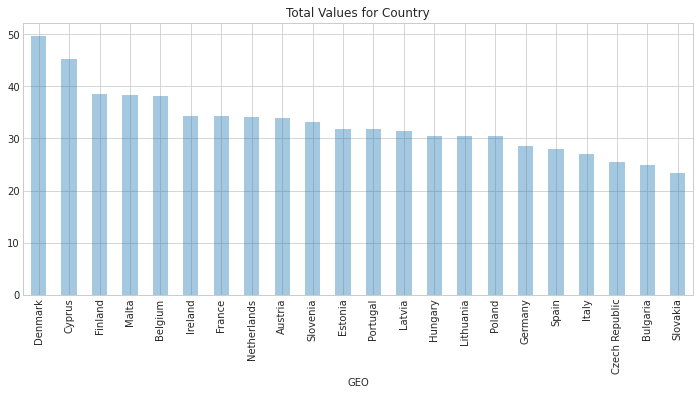

In [34]:
fig = plt.figure(figsize=(12,5))
total = piv_edu.sum(axis=1).sort_values(ascending=False)
total.plot(kind='bar', style='b', alpha=0.4, title='Total Values for Country');

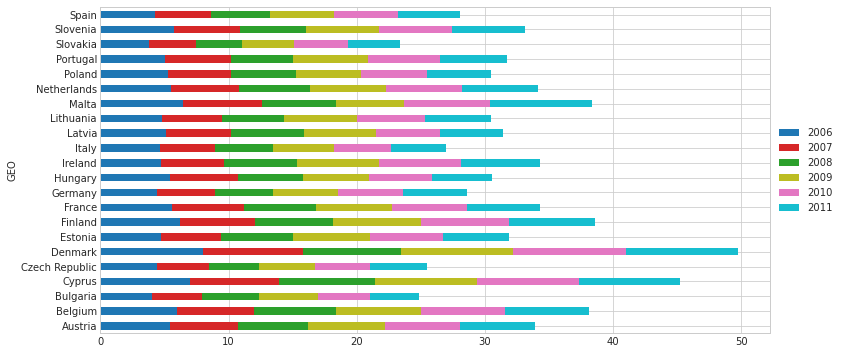

In [35]:
my_colors = ['tab:blue', 'tab:red', 'tab:green', 'tab:olive', 'tab:pink', 'tab:cyan']
ax = piv_edu.plot(kind='barh', stacked=True, color=my_colors, figsize=(12, 6));
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

__Source:__

Igual, Laura, and Santi Seguí. "Chapter 2: Toolbox for Data Scientists." In Introduction to Data Science, pp. 5-28. Springer, 2017.

Link to the [original notebook](https://github.com/DataScienceUB/introduction-datascience-python-book/blob/master/ch02_Toolbox.ipynb).